# Exploratory Data Analysis of used Toyota car

The primary goal is to submit the project of the workshop "Data visualization with Python" conducted by EMK Center. 
<br>The objective of this project is EDA of used Toyota car by barplot, scatter plot, Histogtam, Distribution plot and Boxplot.
<br>The dataset is collected from Kaggle. 
<br>dataset source: https://www.kaggle.com/aishwaryamuthukumar/cars-dataset-audi-bmw-ford-hyundai-skoda-vw

## Exploratory Data Analysis

In [1]:
# required libraries for data analysis
import pandas as pd
import numpy as np

# required libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")

### Dataset information

The cleaned data set contains information of price, transmission, mileage, fuel type, year, model, miles per gallon (mpg), and engine size.

### Loading the dataset

In [2]:
# import the data
# read a csv file as pandas DataFrame
df = pd.read_csv("toyota.csv")

# check the first 5 rows
display(df.head())

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,36.2,2.0


### Create a function to find the number of obsevations for unique value in a column of a DataFrame

In [3]:
def unique_percent_count(data, col):
    # Count the number of unique values present in the respective column
    col_count = data[col].value_counts(normalize = True)
    # Find the percentage of unique values present in the respective column
    col_count = col_count*100
    # Change the type of variable from <class 'pandas.core.series.Series'> to DataFrame
    col_count = pd.DataFrame(col_count)
    # Reset index
    col_count = col_count.reset_index()
    # Rename the columns
    col_count = col_count.rename(columns={'index':col, col:'% of cars'})
    # Display the two digit after decimal point
    col_count['% of cars'] = col_count['% of cars'].round(2)

    return col_count

### Display the number of obsevations for unique value in a column of a DataFrame by calling above function

In [4]:
fuelType_count = unique_percent_count(df, "fuelType")
transmission_count = unique_percent_count(df, "transmission")
model_count = unique_percent_count(df, "model")
year_count = unique_percent_count(df, "year")
year_count = year_count.sort_values(by = 'year')

## Analysis with Barplot

### Create a function to show the number of observations for each unique value in a column by using a Barplot

In [5]:
def barplot(data, x_col, y_col,color, yticks, rotation):
    # data will be the name of the dataframe
    # x_col is the column that will go in the x-axis
    # yticks will be the range/bins/class-interval of y-axis
    # rotation is to rotate the labels
    
    # create a barplot by using seaborn 
    sns.barplot(x=x_col, y = y_col, data=data, color =color)
    # Name each subplot of barplot
    plt.title("Percentage of cars present for each " + x_col)
    # Perform manual changes in yticks & xticks
    # yticks will be different for each DataFrame 
    plt.yticks(yticks)
    # With rotation, it will rotate if required
    plt.xticks(rotation=rotation)

### Display a figure of barplot that contains multiple subplots by calling above barplot function

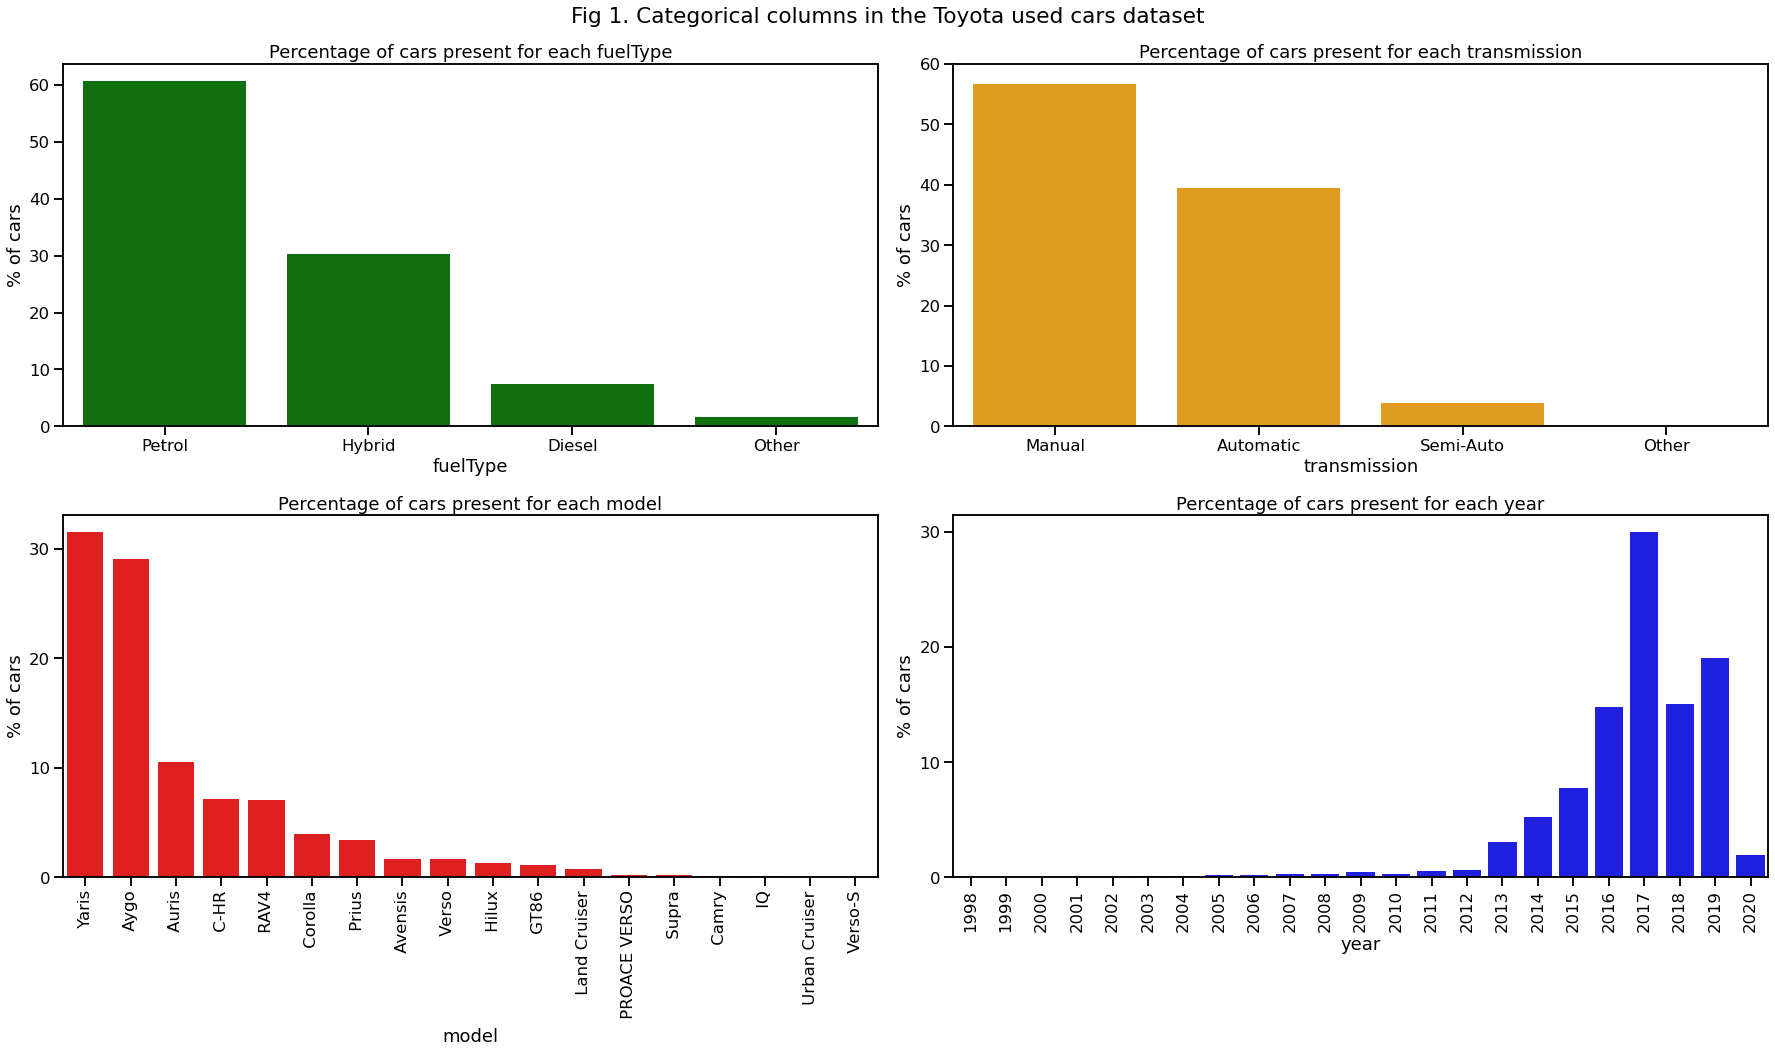

In [6]:
# Set the layout of graphs. Other options are "book" & "paper"
sns.set_context("talk")
# Set the size of the graph (Width, Length/Height)
plt.figure(figsize=(25,15))

plt.subplot(2,2,1)
barplot(fuelType_count,"fuelType", "% of cars", "green",np.arange(0,70,10), 0)

plt.subplot(2,2,2)
barplot(transmission_count,"transmission", "% of cars","orange",np.arange(0,70,10), 0)

plt.subplot(2,2,3)
barplot(model_count, "model", "% of cars", "red", np.arange(0,40,10), 90)

plt.subplot(2,2,4)
barplot(year_count, "year", "% of cars","blue",np.arange(0,40,10), 90)

plt.suptitle('Fig 1. Categorical columns in the Toyota used cars dataset')

plt.tight_layout()
plt.show()

#### Remarks

In Fig 1., the first graph shows the percentage of used Toyota cars with four types of fuel.
<br> The second graph shows the percentage of used Toyota cars for four types of transmission
<br> The third graph shows the percentage of used Toyota cars for several model
<br> The fourth graph shows the percentage of used Toyota cars for every year from 1998 to 2020.

## Analysis with Scatter plot 

### Create a function to show scatterplot with numeric columns

In [7]:
def scatter_plot(data, x_col, y_col, hue):
    # data will be the name of the dataframe
    # x_col is the column that will go in the x-axis
    #
    
    # create a scatter plot by using seaborn & plot the parameters accordingly
    sns.scatterplot(x=x_col, y = y_col, data=data, hue =hue)
    # Give proper title for scatter plot
    plt.title('Fig 2. '+x_col+' vs '+y_col +' scatter_plot')

### Display scatter plot using scatterplot function

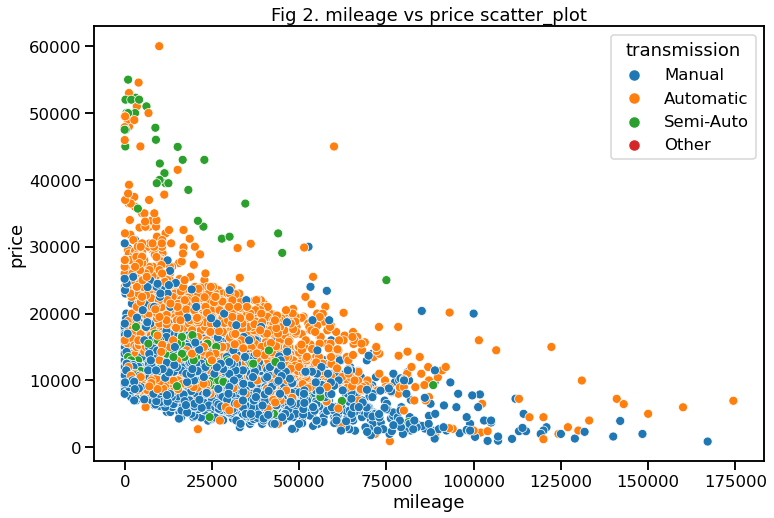

In [8]:
plt.figure(figsize=(12,8))
scatter_plot(df, 'mileage', 'price', 'transmission')

plt.show()

### Findings from Fig 2. 
 The price of Semi-Auto cars is mostly in high & medium range.
<br> The price of manual cars is low.
<br> The price of Automatic cars is high.

## Analysis with Histogram

### Create a function to show Histogram with numeric columns

In [9]:
def histogram(data, x_col, binwidth):      
    sns.histplot(x=x_col, binwidth= binwidth, data=data)

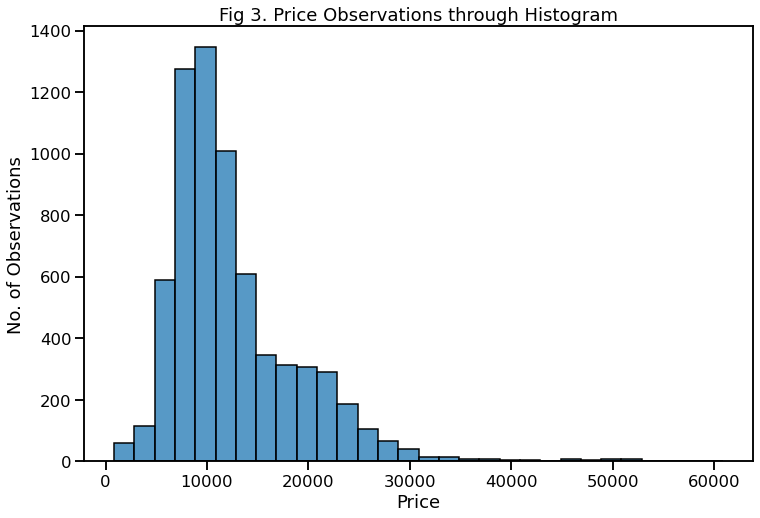

In [10]:
sns.set_context("talk")
plt.figure(figsize=(12,8))
histogram(df, 'price', 2000) 
plt.xlabel('Price')
plt.ylabel('No. of Observations')
plt.title("Fig 3. Price Observations through Histogram")
plt.show()

#### Remarks

Fig 3. shows the number of observations in-terms of price. Mostly, the price of used Toyota cars lies between 5000 to 20000 USD.

## Analysis with ECDF Plot

### Create a function to show ECDF plot with numeric columns

In [11]:
def ECDF(data, x_col, binwidth, stat):
    sns.histplot(x=x_col, binwidth= binwidth, data=data, stat=stat, cumulative=True)

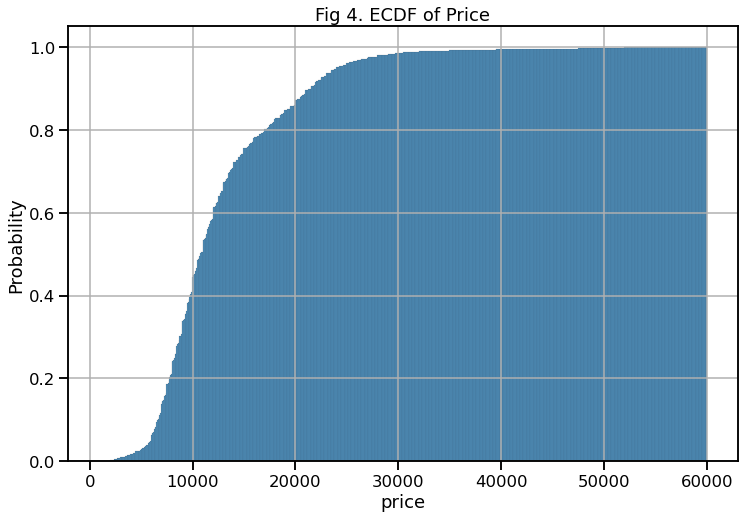

In [12]:
plt.figure(figsize=(12, 8))
ECDF(df,'price',75, 'probability')

plt.grid()
plt.title("Fig 4. ECDF of Price")
plt.show()

#### Remarks

Fig 6. displays the emprical cumulative distribution of price of used Toyota cars.The graph shows the probability of occurrence of the price at a given place. For example, the probability of price being less than or equal to 20000 is approximately 0.6

## Analysis with Distribution Plot

### Create a function to show distribution plot with numeric columns

In [17]:
def distribution_plot(df, x_col):
    column = pd.Series(df[x_col], name="x_col")
    column = sns.distplot(column, rug=True, hist=False)
    return column

C:\Users\Home\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Home\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


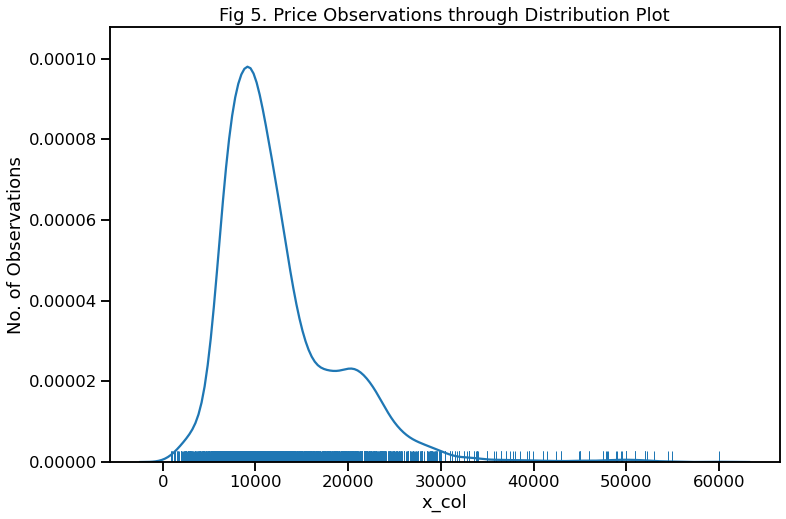

In [18]:
plt.figure(figsize=(12,8))
distribution_plot(df, "price") 
plt.ylabel('No. of Observations')
plt.title("Fig 5. Price Observations through Distribution Plot")
plt.show()

#### Remarks

In Fig 5. the distribution of price is positively skewed. 

## Analysis with Boxplot

### Create a function to show boxplot

In [19]:
def box_plot(x_col, y_col, data, yticks, hue):
    sns.boxplot(x=x_col, y=y_col, data=data, showfliers=False)
    
    plt.yticks(yticks)

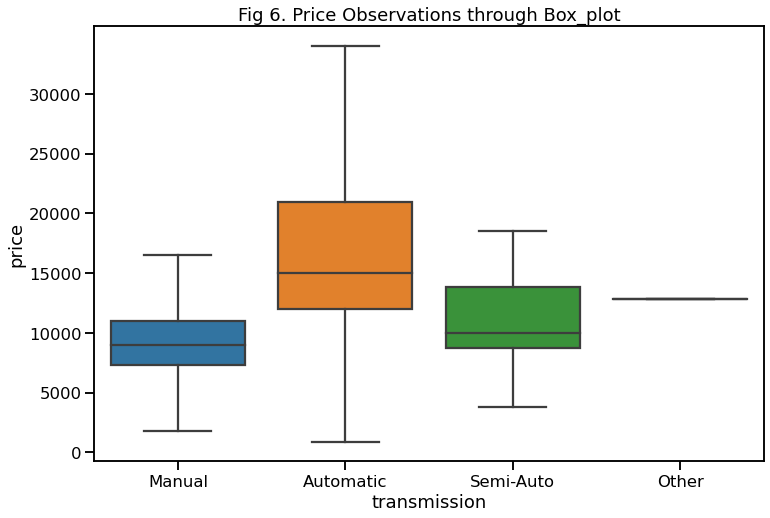

In [20]:
plt.figure(figsize=(12,8))
box_plot("transmission", "price", df, np.arange(0,35000,5000), None)

plt.title("Fig 6. Price Observations through Box_plot")
plt.show()

#### Remarks

In Fig 6. the price of Automatic car is in high range with respect to Semi-Auto and Manual.
<br>The price of Semi-Auto car is mostly in medium range.
<br>The price of Manual car is in low-medium range comparatively.